# PART 2: PREDICITON

## Importing Preprocessed Data

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
journal_table_csv = pd.read_csv("journal_tablen.csv")
journal_table_csv

,download,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,submitted_2016,submitted_2017,submitted_2018,...,abstract_lda_10,abstract_lda_11,abstract_lda_12,abstract_lda_13,abstract_lda_14,abstract_lda_15,abstract_lda_16,abstract_lda_17,abstract_lda_18,abstract_lda_19
0,6.920672,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.797942,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.701962,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6.300788,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,6.669499,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.791926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1021,1.386544,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1022,1.946053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1023,1.098946,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
nationality_csv = pd.read_csv("nationality.csv", sep=';')
nationality_csv

,Indo,Mix,Non-Indo,Writers,FirstIndo
0,1,0,0,1,1
1,0,0,1,3,0
2,1,0,0,3,1
3,0,0,1,3,0
4,0,0,1,4,0
...,...,...,...,...,...
1020,1,0,0,4,1
1021,1,0,0,5,1
1022,0,1,0,4,1
1023,1,0,0,3,1


In [4]:
journal_table = pd.concat([journal_table_csv, nationality_csv], axis=1)
journal_table

,download,citing_q2th,submitted_2011,submitted_2012,submitted_2013,submitted_2014,submitted_2015,submitted_2016,submitted_2017,submitted_2018,...,abstract_lda_15,abstract_lda_16,abstract_lda_17,abstract_lda_18,abstract_lda_19,Indo,Mix,Non-Indo,Writers,FirstIndo
0,6.920672,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,6.797942,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,3,0
2,6.701962,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,3,1
3,6.300788,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3,0
4,6.669499,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1.791926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,1
1021,1.386544,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5,1
1022,1.946053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,1
1023,1.098946,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1


## Train Data

In [5]:
X = journal_table.drop('citing_q2th', axis=1)
y = journal_table['citing_q2th']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression(max_iter=10000)

In [10]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### ROC Curve

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [12]:
# predict probabilities
predict = lr.predict_proba(X_test)

In [13]:
# keep probabilities for the positive outcome only
predict = predict[:, 1]

In [14]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predict)

In [15]:
import matplotlib.pyplot as plt

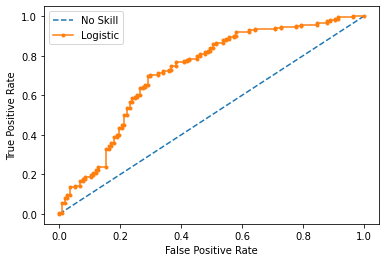

In [16]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [17]:
lr_auc = roc_auc_score(y_test, predict)
lr_auc

0.7241687922316195

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
predict = lr.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, predict)

In [21]:
cm

array([[ 59,  58],
       [ 33, 158]])

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       117
           1       0.73      0.83      0.78       191

    accuracy                           0.70       308
   macro avg       0.69      0.67      0.67       308
weighted avg       0.70      0.70      0.70       308



### Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
c_space = np.logspace(-20,10)
param_grid = {'C': c_space}

In [37]:
c_space

array([1.00000000e-20, 4.09491506e-20, 1.67683294e-19, 6.86648845e-19,
       2.81176870e-18, 1.15139540e-17, 4.71486636e-17, 1.93069773e-16,
       7.90604321e-16, 3.23745754e-15, 1.32571137e-14, 5.42867544e-14,
       2.22299648e-13, 9.10298178e-13, 3.72759372e-12, 1.52641797e-11,
       6.25055193e-11, 2.55954792e-10, 1.04811313e-09, 4.29193426e-09,
       1.75751062e-08, 7.19685673e-08, 2.94705170e-07, 1.20679264e-06,
       4.94171336e-06, 2.02358965e-05, 8.28642773e-05, 3.39322177e-04,
       1.38949549e-03, 5.68986603e-03, 2.32995181e-02, 9.54095476e-02,
       3.90693994e-01, 1.59985872e+00, 6.55128557e+00, 2.68269580e+01,
       1.09854114e+02, 4.49843267e+02, 1.84206997e+03, 7.54312006e+03,
       3.08884360e+04, 1.26485522e+05, 5.17947468e+05, 2.12095089e+06,
       8.68511374e+06, 3.55648031e+07, 1.45634848e+08, 5.96362332e+08,
       2.44205309e+09, 1.00000000e+10])

In [38]:
lr_cv = GridSearchCV(lr, param_grid, cv=10)

In [39]:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-20, 4.09491506e-20, 1.67683294e-19, 6.86648845e-19,
       2.81176870e-18, 1.15139540e-17, 4.71486636e-17, 1.93069773e-16,
       7.90604321e-16, 3.23745754e-15, 1.32571137e-14, 5.42867544e-14,
       2.22299648e-13, 9.10298178e-13, 3.72759372e-12, 1.52641797e-11,
       6.25055193e-11, 2.559547...
       4.94171336e-06, 2.02358965e-05, 8.28642773e-05, 3.39322177e-04,
       1.38949549e-03, 5.68986603e-03, 2.32995181e-02, 9.54095476e-02,
       3.90693994e-01, 1.59985872e+00, 6.55128557e+00, 2.68269580e+01,
       1.09854114e+02, 4.49843267e+02, 1.84206997e+03, 7.54312006e+03,
       3.08884360e+04, 1.26485522e+05, 5.17947468e+05, 2.12095089e+06,
       8.68511374e+06, 3.55648031e+07, 1.45634848e+08, 5.96362332e+08,
       2.44205309e+09, 1.00000000e+10])})

In [40]:
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.09540954763499963}
Best score is 0.7210876369327074


### Using new hyperparameter

In [41]:
lr = LogisticRegression(max_iter = 100000, C = 0.09540954763499963)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.09540954763499963, max_iter=100000)

In [43]:
# predict probabilities
predict = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
predict = predict[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predict)

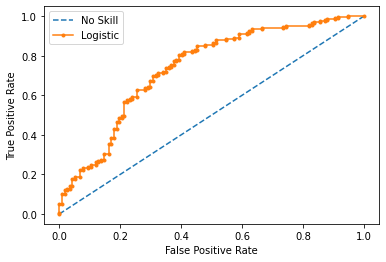

In [44]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [45]:
lr_auc = roc_auc_score(y_test, predict)
lr_auc

0.7379066541370207

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
predict = lr.predict(X_test)

In [48]:
cm = confusion_matrix(y_test, predict)

In [49]:
cm

array([[ 58,  59],
       [ 27, 164]])

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.68      0.50      0.57       117
           1       0.74      0.86      0.79       191

    accuracy                           0.72       308
   macro avg       0.71      0.68      0.68       308
weighted avg       0.72      0.72      0.71       308



### 2nd Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
c_space = np.logspace(-2,-1)
param_grid = {'C': c_space}

In [92]:
c_space

array([0.01      , 0.01048113, 0.01098541, 0.01151395, 0.01206793,
       0.01264855, 0.01325711, 0.01389495, 0.01456348, 0.01526418,
       0.01599859, 0.01676833, 0.01757511, 0.0184207 , 0.01930698,
       0.0202359 , 0.02120951, 0.02222996, 0.02329952, 0.02442053,
       0.02559548, 0.02682696, 0.02811769, 0.02947052, 0.03088844,
       0.03237458, 0.03393222, 0.0355648 , 0.03727594, 0.0390694 ,
       0.04094915, 0.04291934, 0.04498433, 0.04714866, 0.04941713,
       0.05179475, 0.05428675, 0.05689866, 0.05963623, 0.06250552,
       0.06551286, 0.06866488, 0.07196857, 0.0754312 , 0.07906043,
       0.08286428, 0.08685114, 0.09102982, 0.09540955, 0.1       ])

In [93]:
lr_cv = GridSearchCV(lr, param_grid, cv=10)

In [94]:
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(C=0.049, max_iter=100000),
             param_grid={'C': array([0.01      , 0.01048113, 0.01098541, 0.01151395, 0.01206793,
       0.01264855, 0.01325711, 0.01389495, 0.01456348, 0.01526418,
       0.01599859, 0.01676833, 0.01757511, 0.0184207 , 0.01930698,
       0.0202359 , 0.02120951, 0.02222996, 0.02329952, 0.02442053,
       0.02559548, 0.02682696, 0.02811769, 0.02947052, 0.03088844,
       0.03237458, 0.03393222, 0.0355648 , 0.03727594, 0.0390694 ,
       0.04094915, 0.04291934, 0.04498433, 0.04714866, 0.04941713,
       0.05179475, 0.05428675, 0.05689866, 0.05963623, 0.06250552,
       0.06551286, 0.06866488, 0.07196857, 0.0754312 , 0.07906043,
       0.08286428, 0.08685114, 0.09102982, 0.09540955, 0.1       ])})

In [95]:
print("Tuned Logistic Regression Parameters: {}".format(lr_cv.best_params_)) 
print("Best score is {}".format(lr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.04714866363457394}
Best score is 0.7253521126760563


### Using new hyperparameter

In [40]:
lr = LogisticRegression(max_iter = 100000, C = 0.04941713)

In [41]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.04941713, max_iter=100000)

In [42]:
# predict probabilities
predict = lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
predict = predict[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, predict)

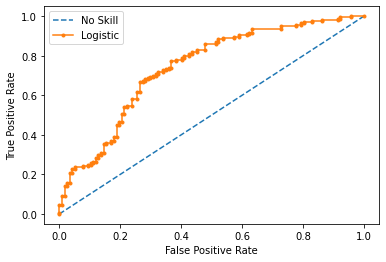

In [43]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [44]:
lr_auc = roc_auc_score(y_test, predict)
lr_auc

0.7414418042690294

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
predict = lr.predict(X_test)

In [47]:
cm = confusion_matrix(y_test, predict)

In [48]:
cm

array([[ 59,  58],
       [ 27, 164]])

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       117
           1       0.74      0.86      0.79       191

    accuracy                           0.72       308
   macro avg       0.71      0.68      0.69       308
weighted avg       0.72      0.72      0.71       308



### Feature Importance

In [51]:
from sklearn.datasets import make_classification

In [52]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.04941713, max_iter=100000)

In [53]:
# get importance
importance = lr.coef_[0]

In [54]:
feature_importance = pd.DataFrame({'features':X_train.columns, 'importance':importance})

In [55]:
feature_importance

,features,importance
0,download,0.574540
1,submitted_2011,0.000000
2,submitted_2012,-0.035373
3,submitted_2013,0.039957
4,submitted_2014,0.047067
...,...,...
90,Indo,0.001126
91,Mix,0.089907
92,Non-Indo,-0.094756
93,Writers,0.038529


In [56]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [57]:
# summarize feature importance
for i, v in sorted(enumerate(importance)):
	print('Feature: %0d, Column: %s, Score: %.5f' % (i,X_train.columns[i],v))

Feature: 0, Column: download, Score: 0.57454
Feature: 1, Column: submitted_2011, Score: 0.00000
Feature: 2, Column: submitted_2012, Score: -0.03537
Feature: 3, Column: submitted_2013, Score: 0.03996
Feature: 4, Column: submitted_2014, Score: 0.04707
Feature: 5, Column: submitted_2015, Score: 0.06505
Feature: 6, Column: submitted_2016, Score: -0.09077
Feature: 7, Column: submitted_2017, Score: 0.08983
Feature: 8, Column: submitted_2018, Score: 0.18097
Feature: 9, Column: submitted_2019, Score: -0.28491
Feature: 10, Column: submitted_2020, Score: -0.01555
Feature: 11, Column: published_2014, Score: 0.01267
Feature: 12, Column: published_2015, Score: 0.03236
Feature: 13, Column: published_2016, Score: 0.18120
Feature: 14, Column: published_2017, Score: -0.10359
Feature: 15, Column: published_2018, Score: 0.21076
Feature: 16, Column: published_2019, Score: -0.11876
Feature: 17, Column: published_2020, Score: -0.21648
Feature: 18, Column: length, Score: 0.26717
Feature: 19, Column: title_ld

In [58]:
fi_sorted = feature_importance.sort_values('importance')

In [61]:
fi_sorted.head(95)

,features,importance
9,submitted_2019,-0.284912
17,published_2020,-0.216483
67,keyword_lda_17,-0.188543
25,introduction_NoW,-0.186383
61,keyword_lda_11,-0.181980
32,title_lda_2,-0.166658
30,title_lda_0,-0.140344
66,keyword_lda_16,-0.139032
16,published_2019,-0.118758
73,abstract_lda_3,-0.103678


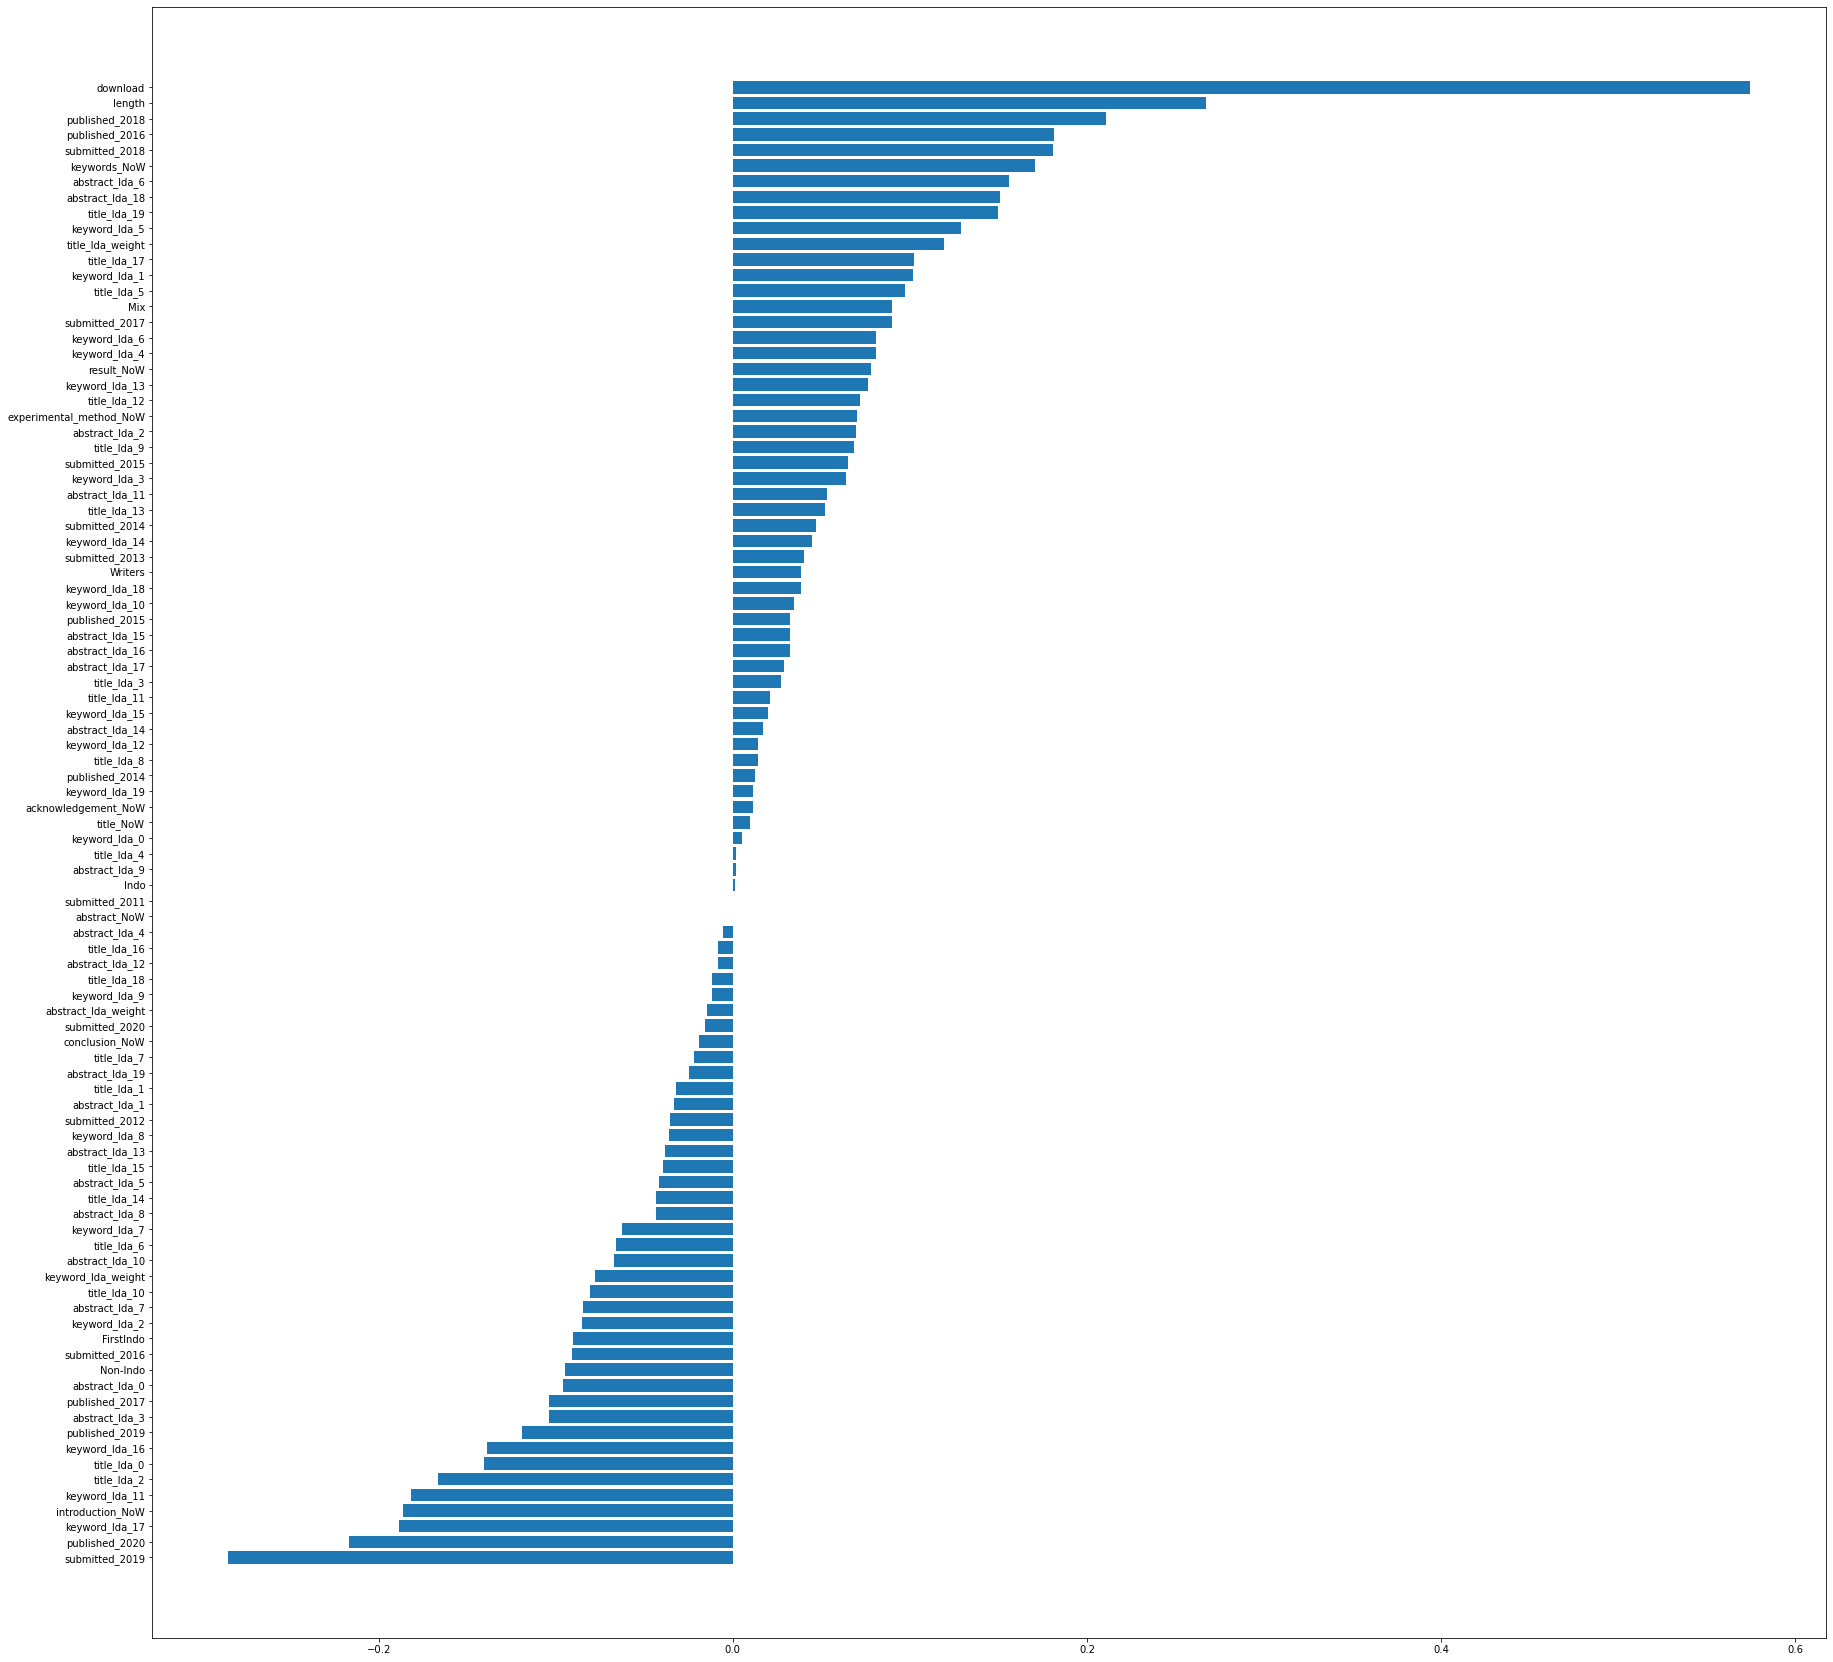

In [62]:
# plot feature importance
plt.figure(figsize=(30,30))
plt.barh(fi_sorted['features'], fi_sorted['importance'])
plt.show()

In [116]:
fi_sorted.to_csv("fi_csv_new.csv",index=None)

# Part 3: Optimization

In [43]:
from numpy.random import randn
from numpy.random import rand

In [40]:
print(X.shape)

(1025, 95)


In [64]:
solution = lr.coef_[0]

In [65]:
solution

array([ 6.72788099e-01,  0.00000000e+00, -7.28725041e-02,  7.67464590e-02,
        8.20631533e-02,  6.37662569e-02, -1.46553429e-01,  1.26745640e-01,
        2.19052191e-01, -3.85746775e-01,  6.01162089e-03,  2.40830911e-02,
        5.51734278e-02,  2.64704091e-01, -1.48896365e-01,  2.25228439e-01,
       -1.56315871e-01, -2.99261235e-01,  4.15773583e-01,  2.17161598e-01,
       -1.51027794e-01, -4.97424473e-02, -1.01930985e-02,  1.89411468e-01,
       -9.10748030e-05, -1.86877115e-01,  5.41588893e-02, -1.75328155e-02,
        2.77017147e-02,  9.05659332e-02, -2.17810324e-01, -5.10903547e-02,
       -2.67069958e-01,  5.50830492e-02, -1.28383735e-03,  1.59913937e-01,
       -9.17389661e-02, -4.72091622e-02,  1.97161844e-02,  8.22293361e-02,
       -1.39939472e-01,  2.75800741e-02,  1.11221586e-01,  9.16439766e-02,
       -6.49667588e-02, -6.06476965e-02, -1.93337516e-02,  1.69321670e-01,
       -3.27731728e-02,  2.46366255e-01,  2.57613959e-02,  1.69685767e-01,
       -1.44527480e-01,  

In [44]:
#initial solution
solution = rand(coef_num)

In [56]:
#generating output predictions using model coefficients
def predict_dataset(X):
	yhats = list()
	for row in X:
		# make a prediction
		yhat = LogisticRegression(max_iter = 100000, C = 0.1)
		# store the prediction
		yhats.append(yhat)
	return yhats

In [57]:
# objective function
def objective(X, y):
	# generate predictions for dataset
	yhat = predict_dataset(X)
	# round predictions to labels
	yhat = [round(y) for y in yhat]
	# calculate accuracy
	score = accuracy_score(y, yhat)
	return score

In [ ]:
# hill climbing local search algorithm
def hillclimbing(X, y, objective):
	# evaluate the initial point
	solution_eval = objective(X, y, solution)
    # max iter
    n_iter = 10000
    # step size
    step_size = 0.1
	# run the hill climb
	for i in range(n_iter):
		# take a step
		candidate = solution + randn(len(solution)) * step_size
		# evaluate candidate point
		candidte_eval = objective(X, y, candidate)
		# check if we should keep the new point
		if candidte_eval >= solution_eval:
			# store the new point
			solution, solution_eval = candidate, candidte_eval
			# report progress
			print('>%d %.5f' % (i, solution_eval))
	return [solution, solution_eval]

In [ ]:
1.	Menentukan faktor apa saja yang diperkirakan berpengaruh besar pada popularitas paper
2.	Mengkuantisasi besarnya pengaruh dari setiap faktor yang memengaruhi popularitas paper
3.	Menentukan parameter-parameter terbaik pada algoritma machine learning yang digunakan untuk mencapai tujuan 1 dan 2.
